| ESCUELA POLITÉCNICA NACIONAL  |                              |              |
|-------------------------------|------------------------------|--------------|
| **Estructuras de Datos y Algoritmos II – Computación**     | | **Proyecto**        |
| NOMBRES:                      |   Ivonne Carolina Ayala      |              |
|                               |   David Esteban Morales      |              |
|                               |   Brandon Ismael Freire      |              |

## Proyecto Bimestre 1

### 1. OBJETIVOS

   - Implementar y analizar los algoritmos de Búsqueda en Anchura (BFS) y Búsqueda en Profundidad (DFS) en Python, empleando el paradigma orientado a objetos y la estructura de datos grafo, para comprender su aplicación en la resolución de problemas de conectividad en grafos.
   
   - Diseñar e implementar una estructura de datos para grafos utilizando clases en Python, definiendo las clases Grafo, Nodo y Arista para representar los componentes básicos de un grafo.

   - Implementar la funcionalidad de seguimiento de rutas en ambos algoritmos, para identificar caminos específicos entre un nodo de inicio y un nodo de destino, evaluando el comportamiento de ambos en el problema planteado.

### 2. INTRODUCCIÓN

En el área de la computación, los grafos representan una de las estructuras de datos fundamentales, utilizadas para modelar un gran número de sistemas complejos como redes sociales, medios de transporte, redes y mapas de rutas/caminos. Un grafo se basa en un conjunto de nodos (también llamados vértices) conectados entre sí mediante aristas, puede ser dirigido o no dirigido, y con pesos o sin pesos. Por lo que, la representación y manipulación de grafos es importante en la resolución de diferentes problemas, independientemente de si sean computacionales o no.

En el presente informe, se abordan dos algoritmos fundamentales estudiados hasta el momento: Breadth-first Search (BFS) y Depth-first Search (DFS), cada uno de estos implementados en Python, siguiendo el paradigma orientado a objetos. Para ello, se definieron las clases *Grafo*, *Nodo* y *Arista*, que permiten construir y manipular grafos de manera más flexible. 

El primero, el algoritmo BFS explora los nodos vecinos de un nivel antes de pasar al siguiente. Dicho de otro modo, se expande hacia fuera desde el nodo inicial, lo que lo hace ideal para encontrar la ruta mas corta. 

BFS sigue los siguientes pasos generales:

1) Inicialización: Se selecciona un vértice origen y crea una cola vacía. Marca el vértice origen como encolado y lo encola.

2) Exploración/Búsqueda: Mientras la cola no esté vacía, realiza los siguientes pasos: 

   a. Desencola el siguiente vértice en la cola. 
   
   b. Procesa el vértice (por ejemplo; se lo puede imprimir o guardar en una lista de vértices visitados, etc.). 
   
   c. Encuentra todos los vértices adyacentes al vértice origen que no han sido encolados y los marca como encolados. A continuación, encola estos vértices en la cola.

3) Finalización: Cuando la cola esté vacía, el algoritmo BFS habrá visitado todos los vértices alcanzables desde el vértice origen, lo que temrinará el programa.

Por otro lado, el algoritmo DFS explora tan lejos como sea posible a partir de cada nodo antes de retroceder, lo cual es útil en problemas de conectividad, como resolución de laberintos y problemas de búsqueda de rutas/caminos.

1) Inicialización: Se selecciona un nodo de inicio, y se inicializan variables para rastrear la ruta y la profundidad.

2) Exploración/Búsqueda: Se la realiza de manera recursiva y partiendo del nodo inicio especificado.

3) Finalización: Después de haber completado la exploración, se devuelve el path (el camino mas largo encontrado) y la profundidad máxima alcanzada.

### 3. EJERCICIOS PLANTEADOS Y/O PROGRAMAS IMPLEMENTADOS

1. Dados los algoritmos BFS y DFS, realizar la implementación en Python siguiendo el paradigma orientado a objetos y el ADT de grafo (debería definir las clases Grafo, Nodo y Arista).

In [ ]:
# Clase Arista del Grafo
class Arista:
    def __init__(self, nodo_origen, nodo_destino):
        self.nodo_origen = nodo_origen
        self.nodo_destino = nodo_destino
        # self.peso = peso


In [ ]:
# Clase Nodo del Grafo
class Node:
    def __init__(self, id, data = None):
        self.id = id
        self.data = data
        self.neighbors = []
        self.parent = None
        self.is_analized = False

In [12]:
from Arista import Arista
from Node import Node

class Graph:

    def __init__(self):
        # Inicializa el grafo con un diccionario de nodos y una lista de aristas
        self.nodes = {}
        self.arista = []

    def add_node(self, node: Node):
        # Agrega un nodo al diccionario de nodos usando su id como clave
        self.nodes[node.id] = node

    def agregar_arista(self, arista: Arista):
        # Agrega una arista a la lista de aristas
        self.arista.append(arista)

    def create_graph(self, id_list: list, neighbor_list: list) -> None:
        # Crea el grafo a partir de dos listas: id_list (ids de nodos) y neighbor_list (lista de vecinos)
        if len(id_list) == len(neighbor_list):
            # Verifica que ambas listas tengan el mismo tamaño
            for id in id_list:
                # Crea y agrega un nodo por cada id en id_list
                node = Node(id)
                self.add_node(node)

            # Asigna los vecinos a cada nodo
            for i, neighbors in enumerate(neighbor_list):
                node = self.nodes[id_list[i]]  # Obtiene el nodo actual
                for neighbor in neighbors:
                    # Agrega los vecinos al nodo actual (se asume que los vecinos ya existen en el grafo)
                    node.neighbors.append(self.nodes[neighbor])

            print('Graph created')
        else:
            # Si las listas no tienen el mismo tamaño, muestra un mensaje de error
            print('Lists do not match in size')

    def reset_graph(self):
        # Reinicia el estado de cada nodo en el grafo (is_analized) a False
        for node in self.nodes.values():
            node.is_analized = False



2. Muestre la ejecución de los dos algoritmos con un ejemplo de grafo (ingreso por consola o por archivo). Asuma la aplicación de BFS y DFS en casos de uso reales (por ejemplo: las salidas de evacuación en un campus universitario) y describa el caso de ejemplo o definición del problema y la demo del algoritmo. Debería desplegarse el resultado para:

   a. BFS: la ruta más corta de nodo Start al nodo Finish

   b. DFS: la ruta más profunda de nodo Start al nodo Finish


In [ ]:
from collections import deque
from Graph import Graph

# Función para realizar una búsqueda en anchura (BFS) en el grafo y construir un árbol de recorrido
def bfs_tree(graph: Graph, start):
    # Restablece el estado del grafo para evitar interferencias de búsquedas anteriores
    graph.reset_graph()

    # Inicializa la cola para la BFS con el nodo de inicio
    queue = deque()
    queue += [graph.nodes[start]]

    # Mientras la cola no esté vacía, sigue recorriendo el grafo
    while queue:
        # Extrae el primer nodo de la cola
        node = queue.popleft()
        node.is_analized = True  # Marca el nodo como analizado

        # Itera sobre los vecinos del nodo actual
        for neighbor in node.neighbors:
            if not neighbor.is_analized:
                # Si el vecino no ha sido analizado, se agrega a la cola
                queue.append(neighbor)
                # Asigna el nodo actual como el padre del vecino
                neighbor.parent = node
                neighbor.is_analized = True  # Marca el vecino como analizado

# Función para obtener el camino desde el nodo de inicio hasta un nodo de búsqueda específico
def get_path(graph, search_node):
    path = []  # Lista para almacenar el camino encontrado
    node = graph.nodes.get(search_node)  # Obtiene el nodo de búsqueda del grafo

    # Verifica si el nodo de búsqueda existe en el grafo
    if node is None:
        print("El nodo buscado no existe en el graph.")
        return

    # Reconstruye el camino desde el nodo de búsqueda hasta el nodo de inicio
    while node is not None:
        path.append(node.id)  # Agrega el id del nodo al camino
        node = node.parent  # Retrocede al nodo padre

    # Invierte el camino para que empiece desde el nodo de inicio
    path.reverse()
    return path


In [ ]:
from Graph import Graph
from Node import Node

# Función para encontrar el camino más profundo en un grafo utilizando DFS
def get_deep_path(graph: Graph, start, finish=None) -> tuple:
    max_deep = 0  # Variable para almacenar la máxima profundidad encontrada
    deep_path = []  # Lista para almacenar el camino más profundo
    path = []  # Lista para almacenar el camino actual
    start_node = graph.nodes.get(start)  # Obtiene el nodo de inicio a partir del id

    # Función auxiliar para realizar la búsqueda en profundidad (DFS)
    def dfs(start_node: Node, path, finish=None) -> None:
        nonlocal max_deep, deep_path  # Accede a las variables externas dentro de la función

        # Agrega el id del nodo actual al camino
        path.append(start_node.id)

        # Actualiza el camino más profundo si la profundidad actual es mayor
        # y si se ha alcanzado el nodo de destino (si se especificó)
        if len(path) > max_deep and (finish is None or path[-1] == finish):
            max_deep = len(path)  # Actualiza la máxima profundidad
            deep_path = path[:]  # Copia el camino actual como el más profundo

        # Recorre los vecinos del nodo actual
        for neighbor in start_node.neighbors:
            if neighbor.id not in path:  # Evita ciclos comprobando si el vecino ya está en el camino
                dfs(neighbor, path, finish)

        # Elimina el nodo actual del camino para retroceder en la búsqueda
        path.pop()

    # Llama a la función DFS comenzando desde el nodo de inicio
    dfs(start_node, path, finish)

    # Devuelve el camino más profundo y la máxima profundidad encontrada
    return deep_path, max_deep


In [ ]:
from BFS import bfs_tree, get_path
from DFS import get_deep_path
from Graph import Graph

# Función para crear el grafo con nodos y sus conexiones (vecinos)
def create_graph():
    # Lista de nodos (paradas de transporte)
    nodes = [
        'Riocentro', 'TroleBus-Laures', 'Ecovia-Riococa', 'Alborada-Shyris y Tomas de Berlanga',
        'Metro-Jipijapa', 'Ecovia-Colegio24Mayo', 'Alborada-ShyrisYNacionesUnidas', 'Metro-Inaquito',
        'Metro-LaCarolina', 'Ecovia-CasaCultura', 'Alborada-12OctubreTarqui', 'Metro-LaPradera', 'Metro-ElEjido',
        'Ecovia-MarinCentral', 'Metro-UCE', 'Metro-Alameda', 'Metro-SanFrancisco', 'CentroHistorico'
    ]

    # Lista de vecinos para cada nodo (representa las conexiones entre paradas)
    neighbors = [
        ['TroleBus-Laures', 'Ecovia-Riococa', 'Alborada-Shyris y Tomas de Berlanga'],
        ['Metro-Jipijapa', 'Ecovia-Riococa'],
        ['TroleBus-Laures', 'Ecovia-Colegio24Mayo'],
        ['Alborada-ShyrisYNacionesUnidas', 'Metro-Jipijapa'],
        ['Metro-Inaquito', 'Alborada-Shyris y Tomas de Berlanga'],
        ['Metro-LaCarolina', 'Ecovia-CasaCultura'],
        ['Metro-Inaquito', 'Alborada-12OctubreTarqui'],
        ['Metro-LaCarolina', 'Alborada-ShyrisYNacionesUnidas'],
        ['Metro-LaPradera'],
        ['Metro-ElEjido', 'Alborada-12OctubreTarqui', 'Ecovia-MarinCentral'],
        ['Ecovia-CasaCultura', 'Metro-ElEjido', 'Ecovia-MarinCentral'],
        ['Metro-UCE'],
        ['Metro-Alameda', 'Alborada-12OctubreTarqui', 'Ecovia-CasaCultura'],
        ['CentroHistorico'],
        ['Metro-ElEjido'],
        ['Metro-SanFrancisco'],
        ['CentroHistorico'],
        []
    ]

    # Crea una instancia del grafo
    graph = Graph()
    # Crea el grafo con la lista de nodos y vecinos
    graph.create_graph(nodes, neighbors)
    return graph

# Función principal para interactuar con el usuario
def main():
    print('Creating graph...')
    graph = create_graph()

    # Sección para encontrar el camino más corto usando BFS
    print('******** SHORTEST PATH ********')
    start = input('Enter the start node: ')  # Nodo de inicio para BFS
    finish = input('Enter the finish node: ')  # Nodo de destino para BFS
    bfs_tree(graph, start)  # Ejecuta BFS desde el nodo de inicio
    path = get_path(graph, finish)  # Obtiene el camino más corto hasta el nodo de destino
    print('The shortest path from {} to {} is: {}'.format(start, finish, path))

    # Sección para encontrar el camino más profundo usando DFS
    print('\n******** DEEPEST PATH ********')
    start = input('Enter the start node: ')  # Nodo de inicio para DFS
    # Verifica si el usuario quiere buscar un nodo específico
    if input('Do you want to search a specific node? (y/n): ') == 'y':
        finish = input('Enter the finish node: ')  # Nodo de destino para DFS
        deep_path, max_deep = get_deep_path(graph, start, finish)  # Obtiene el camino más profundo hasta el nodo de destino
        print('The deepest path from \n{} to \n{} is {}'.format(start, finish, deep_path))
    else:
        deep_path, max_deep = get_deep_path(graph, start)  # Obtiene el camino más profundo desde el nodo de inicio
        print('The deepest path in the graph is {}'.format(deep_path))

# Punto de entrada del programa
if __name__ == '__main__':
    main()


Creatring graph...
Graph created
******** SHORTEST PATH ********
The shortest path from Riocentro to CentroHistorico is: ['Riocentro', 'Ecovia-Riococa', 'Ecovia-Colegio24Mayo', 'Ecovia-CasaCultura', 'Ecovia-MarinCentral', 'CentroHistorico']

******** DEEPEST PATH ********
The deepest path from Riocentro to CentroHistorico is ['Riocentro', 'Ecovia-Riococa', 'TroleBus-Laures', 'Metro-Jipijapa', 'Alborada-Shyris y Tomas de Berlanga', 'Alborada-ShyrisYNacionesUnidas', 'Metro-Inaquito', 'Metro-LaCarolina', 'Metro-LaPradera', 'Metro-UCE', 'Metro-ElEjido', 'Alborada-12OctubreTarqui', 'Ecovia-CasaCultura', 'Ecovia-MarinCentral', 'CentroHistorico']


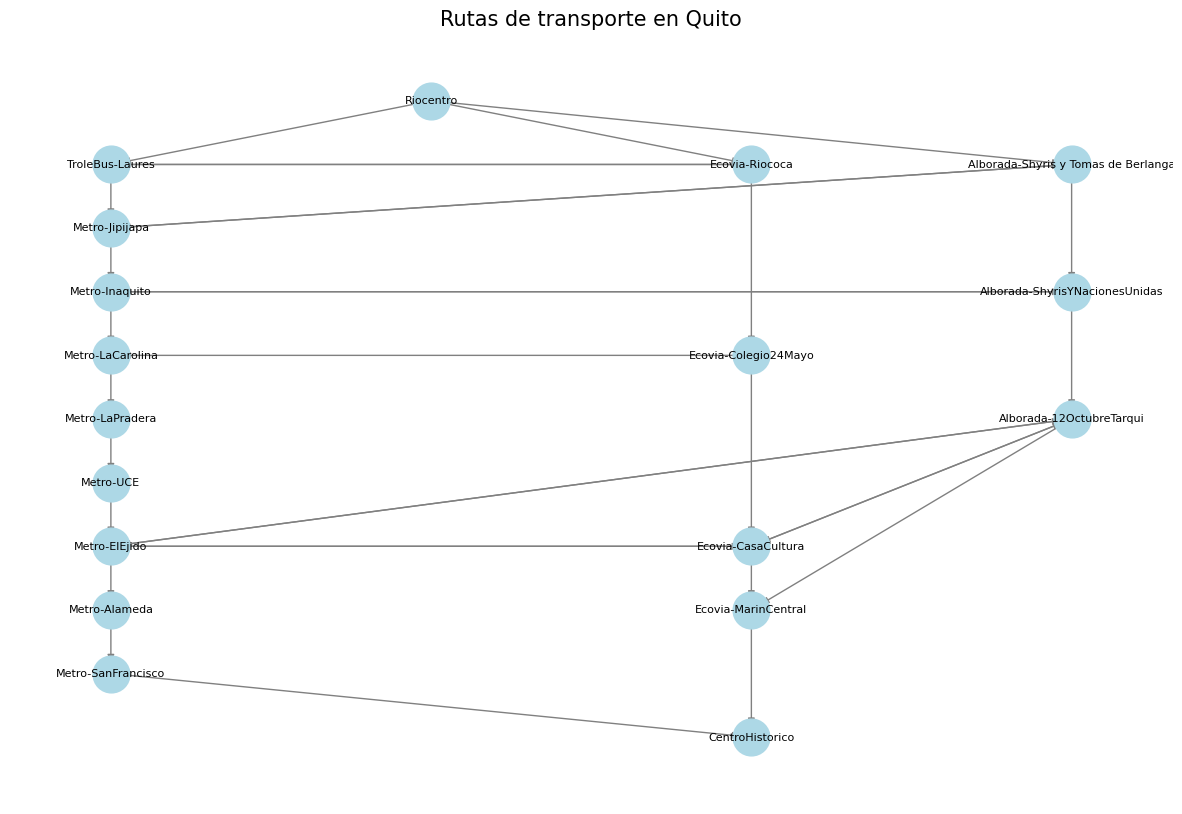

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Diccionario que define el grafo con nodos y sus vecinos
grafo_dict = {
    'Riocentro': ['TroleBus-Laures', 'Ecovia-Riococa', 'Alborada-Shyris y Tomas de Berlanga'],
    'TroleBus-Laures': ['Metro-Jipijapa', 'Ecovia-Riococa'],
    'Ecovia-Riococa': ['TroleBus-Laures', 'Ecovia-Colegio24Mayo'],
    'Alborada-Shyris y Tomas de Berlanga': ['Alborada-ShyrisYNacionesUnidas', 'Metro-Jipijapa'],
    'Metro-Jipijapa': ['Metro-Inaquito', 'Alborada-Shyris y Tomas de Berlanga'],
    'Ecovia-Colegio24Mayo': ['Metro-LaCarolina', 'Ecovia-CasaCultura'],
    'Alborada-ShyrisYNacionesUnidas': ['Metro-Inaquito', 'Alborada-12OctubreTarqui'],
    'Metro-Inaquito': ['Metro-LaCarolina', 'Alborada-ShyrisYNacionesUnidas'],
    'Metro-LaCarolina': ['Metro-LaPradera'],
    'Ecovia-CasaCultura': ['Metro-ElEjido', 'Alborada-12OctubreTarqui', 'Ecovia-MarinCentral'],
    'Alborada-12OctubreTarqui': ['Ecovia-CasaCultura', 'Metro-ElEjido', 'Ecovia-MarinCentral'],
    'Metro-LaPradera': ['Metro-UCE'],
    'Metro-ElEjido': ['Metro-Alameda', 'Alborada-12OctubreTarqui', 'Ecovia-CasaCultura'],
    'Ecovia-MarinCentral': ['CentroHistorico'],
    'Metro-UCE': ['Metro-ElEjido'],
    'Metro-Alameda': ['Metro-SanFrancisco'],
    'Metro-SanFrancisco': ['CentroHistorico'],
    'CentroHistorico': []
}

# Crea un grafo dirigido usando NetworkX
G = nx.DiGraph()

# Agrega nodos y aristas al grafo a partir del diccionario
for nodo, vecinos in grafo_dict.items():
    for vecino in vecinos:
        G.add_edge(nodo, vecino)  # Crea una arista dirigida desde 'nodo' hasta 'vecino'

# Definición de las posiciones de los nodos para la visualización
pos = {
    'Riocentro': (0, 5),
    'TroleBus-Laures': (-1, 4),
    'Ecovia-Riococa': (1, 4),
    'Alborada-Shyris y Tomas de Berlanga': (2, 4),
    'Metro-Jipijapa': (-1, 3),
    'Metro-Inaquito': (-1, 2),
    'Metro-LaCarolina': (-1, 1),
    'Metro-LaPradera': (-1, 0),
    'Metro-UCE': (-1, -1),
    'Metro-ElEjido': (-1, -2),
    'Metro-Alameda': (-1, -3),
    'Metro-SanFrancisco': (-1, -4),
    'CentroHistorico': (0, -4),
    'Ecovia-Colegio24Mayo': (1, 1),
    'Ecovia-CasaCultura': (1, -2),
    'Ecovia-MarinCentral': (1, -3),
    'Alborada-ShyrisYNacionesUnidas': (2, 2),
    'Alborada-12OctubreTarqui': (2, 0),
    'CentroHistorico': (1, -5)  # Posición alternativa para 'CentroHistorico'
}

# Configura la visualización del grafo
plt.figure(figsize=(15, 10))

# Dibuja los nodos del grafo
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

# Dibuja las etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Dibuja las aristas (con flechas, ya que el grafo es dirigido)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)

# Título y ajustes de la visualización
plt.title("Rutas de transporte en Quito", fontsize=15)
plt.axis('off')  # Oculta los ejes
plt.show()



3. Prepare un video de 10 a 15 minutos de duración con la presentación de su proyecto (proyección de pantalla y proyección de expositor) y súbalo a Facebook o Youtube. Comparta el link del video en el grupo de whatsapp de la materia. Tiene al menos 20 likes??

https://youtu.be/495g_M6ueZQ

### 4. CONCLUSIONES

La implementación de los algoritmos de Búsqueda en Anchura (BFS) y Búsqueda en Profundidad (DFS) permitó desmostrar su utilidad en problemas práctios que involucran grafos, como el análisis de rutas de transporte público en Quito. A través de estos algoritmos, se logró modelar y explorar eficientemente las conexiones entre las paradas de metro, ecovía y trolebús, mostrando cómo cada uno es útil para resolver distintos tipos de problemas. Por ejemplo, BFS resultó ideal para encontrar una ruta más corta desde el Riocentro hasta el Centro Historico, mientras que DFS permitió obtener una exploración completa de las conexiones posibles entre ambas paradas.

El uso del paradigma orientado a objetos fue clave para estructurar el grafo de manera clara mediante las clases Grafo, Nodo y Arista. Este enfoque facilitó la representación (creación) de las rutas y las relaciones entre las paradas, permitiendo un diseño más flexible y adaptable a posibles cambios e incluso expansiones futuras. Además, la correcta definición de los nodos y sus vecinos resultó crucial para asegurar el funcionamiento óptimo de los algoritmos, destacando la importancia de un manejo cuidadoso de las estructuras de datos.

Finalmente, este análisis destaca el impacto que tienen herramientas computacionales como BFS y DFS en la planificación y optimización de sistemas de transporte. La capacidad de identificar rutas y posibles mejoras puede beneficiar tanto a los usuarios como a los planificadores urbanos, contribuyendo a un transporte público más eficiente y accesible.

### 5. REFERENCIAS BIBLIOGRÁFICAS
Para este informe se utilizó la informacion de la siguiente fuente:

- https://www.google.com.ec/maps/dir/Riocentro+Shopping+Quito,+Avenida+6+de+Diciembre,+Quito/Centro+Histórico,+Quito/@-0.2330839,-78.5139679,14z/data=!4m14!4m13!1m5!1m1!1s0x91d59b752c818d7b:0x70a183a128abee5c!2m2!1d-78.4761885!2d-0.1659401!1m5!1m1!1s0x91d59a29b566ea0d:0xfee3077329b5374d!2m2!1d-78.5135489!2d-0.2188216!3e3?hl=es&entry=ttu&g_ep=EgoyMDI0MTExMy4xIKXMDSoASAFQAw%3D%3D


### 6. DECLARACIÓN DE USO DE IA
En esta práctica utilicé GPT para revisar y mejorar mi redacción, así como para optimizar la sintaxis de mi trabajo. Además  me ayudó a identificar y corregir los errores que cometí durante el desarrollo de la práctica.